## Lead Scoring Case Study
With 9000 data points we need to identify the most promising leads, i.e. the leads that are most likely to convert into paying customers. 

### Step 1 Importing the Data

In [46]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
#Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
# Importing all datasets
Leads_data = pd.read_csv("Leads.csv")
Leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Step 2: Inspecting the Dataframe

In [48]:
# Let's see the head of our master dataset
Leads_data.shape

(9240, 37)

In [49]:
# let's look at the statistical aspects of the dataframe
Leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [50]:
# Let's see the type of each column
Leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [51]:
# Checking for Null Values

Leads_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [52]:
# Let's drop Prospect ID and Lead Number
Leads_data = Leads_data.drop(['Prospect ID', 'Lead Number'], 1)
Leads_data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [53]:
# As we do have several null values we need to understand the percentage in each column

round(100*(Leads_data.isnull().sum()/len(Leads_data.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [54]:
# There are columns with high null values so we have decided to drop the ones with more than 45%

cols=Leads_data.columns

for i in cols:
    if((100*(Leads_data[i].isnull().sum()/len(Leads_data.index))) >= 35):
        Leads_data.drop(i, 1, inplace = True)

In [55]:
# Converting all the values to lower case
Leads_data = Leads_data.applymap(lambda s:s.lower() if type(s) == str else s)

In [56]:
# Replacing 'Select' with NaN (Since it means no option is selected)
Leads_data = Leads_data.replace('select',np.nan)

In [57]:
Leads_data['Specialization'] = Leads_data['Specialization'].fillna('not provided') 
Leads_data['What matters most to you in choosing a course'] = Leads_data['What matters most to you in choosing a course'].fillna('not provided')
Leads_data['Country'] = Leads_data['Country'].fillna('not provided')
Leads_data['What is your current occupation'] = Leads_data['What is your current occupation'].fillna('not provided')
Leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 29 columns):
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          9240 non-null object
Specialization                                   9240 non-null object
How did you hear about X Education               1990 non-null object
What is your current occupation                  9240

In [58]:
#checking again the null values percentage

round(100*(Leads_data.isnull().sum()/len(Leads_data.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                    0.00
How did you hear about X Education               78.46
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [59]:
# Now let's check if there are any columns with unique values
Leads_data.nunique()

Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            39
Specialization                                     19
How did you hear about X Education                  9
What is your current occupation                     7
What matters most to you in choosing a course       4
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                   

In [60]:
df = Leads_data.drop(['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque'],1)
df.shape

(9240, 24)

In [61]:
# Checking the Categorical Columns
#checking value counts of Country column

df['Country'].value_counts(dropna=False)

india                   6492
not provided            2461
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
bahrain                    7
hong kong                  7
france                     6
oman                       6
unknown                    5
nigeria                    4
south africa               4
canada                     4
kuwait                     4
germany                    4
sweden                     3
china                      2
philippines                2
ghana                      2
italy                      2
netherlands                2
belgium                    2
uganda                     2
asia/pacific region        2
bangladesh                 2
switzerland                1
malaysia                   1
denmark                    1
indonesia                  1
sri lanka                  1
liberia       

In [62]:
round(100*(df['Country'].value_counts(dropna=False)/len(df['Country'].index)), 2)

india                   70.26
not provided            26.63
united states            0.75
united arab emirates     0.57
singapore                0.26
saudi arabia             0.23
united kingdom           0.16
australia                0.14
qatar                    0.11
bahrain                  0.08
hong kong                0.08
france                   0.06
oman                     0.06
unknown                  0.05
nigeria                  0.04
south africa             0.04
canada                   0.04
kuwait                   0.04
germany                  0.04
sweden                   0.03
china                    0.02
philippines              0.02
ghana                    0.02
italy                    0.02
netherlands              0.02
belgium                  0.02
uganda                   0.02
asia/pacific region      0.02
bangladesh               0.02
switzerland              0.01
malaysia                 0.01
denmark                  0.01
indonesia                0.01
sri lanka 

In [63]:
# We can observe that 70% of the leads are from India, 26.7% didn't answer and the rest are from different countries of the world.

### Step 3 EDA

#### Univariate Analysis
##### Categorical Variables


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 24 columns):
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          9240 non-null object
Specialization                                   9240 non-null object
How did you hear about X Education               1990 non-null object
What is your current occupation                  9240

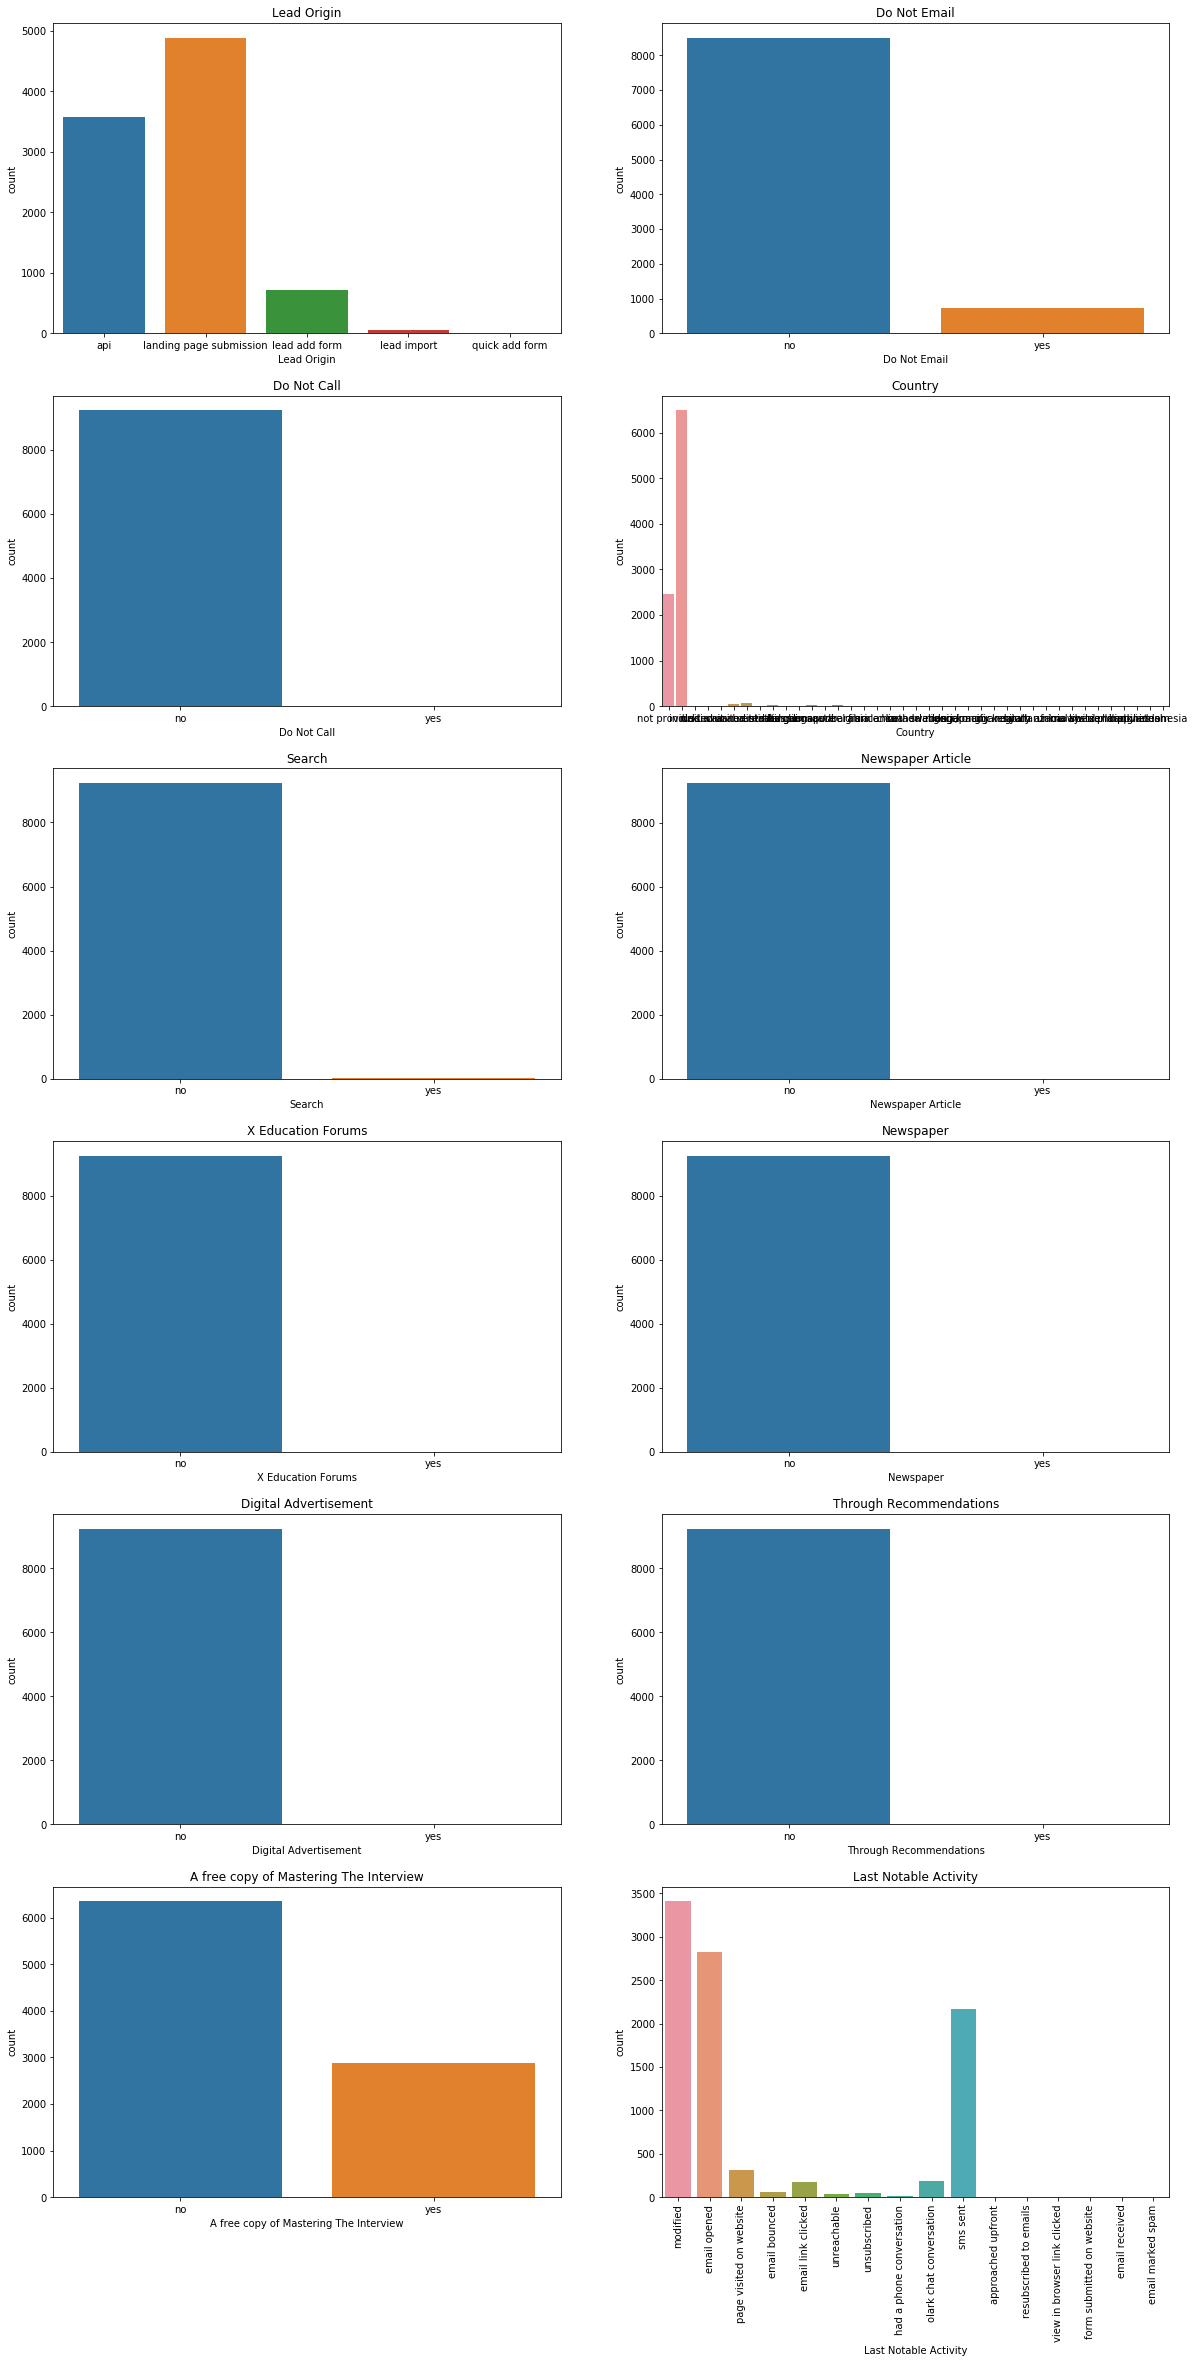

In [65]:
plt.figure(figsize = (20,40))

plt.subplot(6,2,1)
sns.countplot(df['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(df['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(6,2,3)
sns.countplot(df['Do Not Call'])
plt.title('Do Not Call')

plt.subplot(6,2,4)
sns.countplot(df['Country'])
plt.title('Country')

plt.subplot(6,2,5)
sns.countplot(df['Search'])
plt.title('Search')

plt.subplot(6,2,6)
sns.countplot(df['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(6,2,7)
sns.countplot(df['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(6,2,8)
sns.countplot(df['Newspaper'])
plt.title('Newspaper')

plt.subplot(6,2,9)
sns.countplot(df['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(6,2,10)
sns.countplot(df['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(6,2,11)
sns.countplot(df['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.subplot(6,2,12)
sns.countplot(df['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')


plt.show()

In [66]:
# The Lead origin with the most counts if the Landing Page submission followed by the API.
#Most people ask do not to be emailed and not called.
# The last notable activity top three catefories are modified, followed by Email opened nd SMS sent.

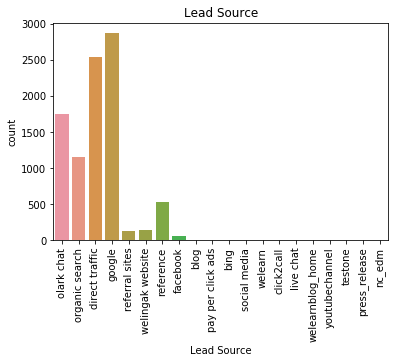

In [67]:
sns.countplot(df['Lead Source']).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

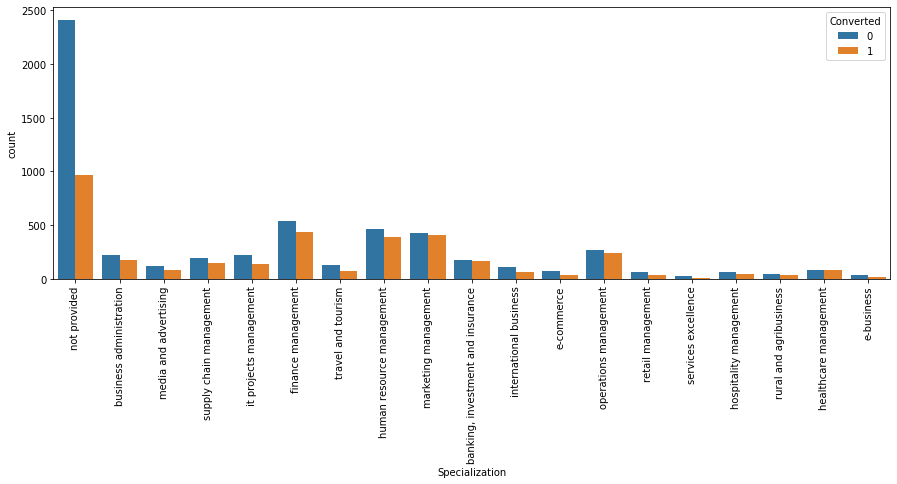

In [68]:
#plotting spread of Specialization columnn 

plt.figure(figsize=(15,5))
s1=sns.countplot(df.Specialization, hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

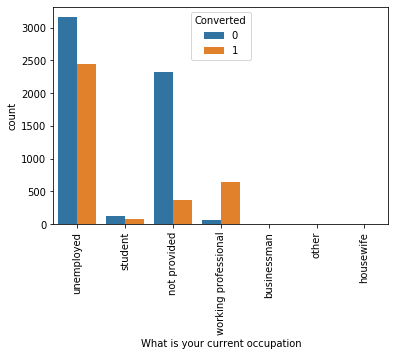

In [69]:
#Next we will plot the current occupation to see the convertion

s1=sns.countplot(df['What is your current occupation'], hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [70]:
#We can see most of the converted leads come from people currently unemployed and second place working professionals.

#### Univariate Analysis
##### Numeric Variables

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 24 columns):
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          9240 non-null object
Specialization                                   9240 non-null object
How did you hear about X Education               1990 non-null object
What is your current occupation                  9240

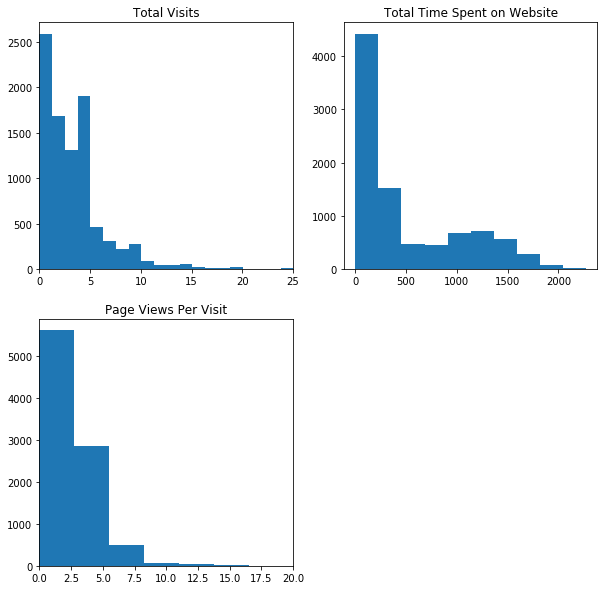

In [72]:
plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(df['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(df['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(df['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

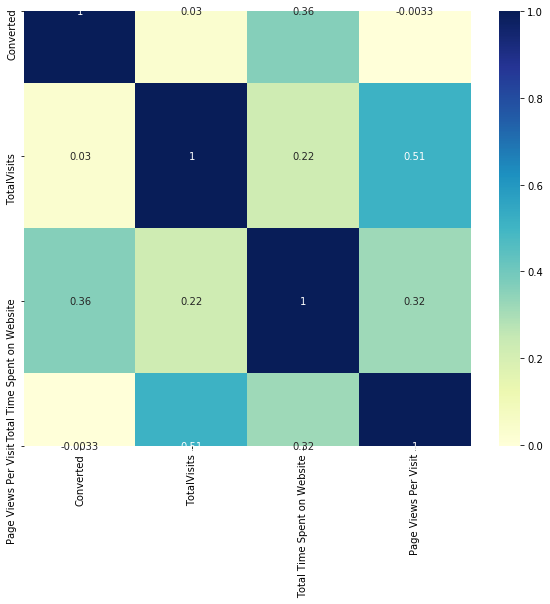

In [73]:
# We will check the correlation 
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [74]:
# There are no high correlation values, the highes one is the total Vistis vs page views per visit.

### Step 4 Data Preparation

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 24 columns):
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          9240 non-null object
Specialization                                   9240 non-null object
How did you hear about X Education               1990 non-null object
What is your current occupation                  9240

In [76]:
df.loc[:, df.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Lead Profile',
       'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [77]:
# Create dummy variables using the 'get_dummies'
dummy = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Lead Profile',
       'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity']], drop_first=True)
# Add the results to the master dataframe
df_dum = pd.concat([df, dummy], axis=1)
df_dum

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,api,olark chat,no,no,0,0.0,0,0.00,page visited on website,not provided,...,0,0,1,0,0,0,0,0,0,0
1,api,organic search,no,no,0,5.0,674,2.50,email opened,india,...,0,0,0,0,0,0,0,0,0,0
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.00,email opened,india,...,0,0,0,0,0,0,0,0,0,0
3,landing page submission,direct traffic,no,no,0,1.0,305,1.00,unreachable,india,...,0,0,1,0,0,0,0,0,0,0
4,landing page submission,google,no,no,1,2.0,1428,1.00,converted to lead,india,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,landing page submission,direct traffic,yes,no,1,8.0,1845,2.67,email marked spam,saudi arabia,...,0,0,0,0,0,0,0,0,0,0
9236,landing page submission,direct traffic,no,no,0,2.0,238,2.00,sms sent,india,...,0,0,0,0,0,0,1,0,0,0
9237,landing page submission,direct traffic,yes,no,0,2.0,199,2.00,sms sent,india,...,0,0,0,0,0,0,1,0,0,0
9238,landing page submission,google,no,no,1,3.0,499,3.00,sms sent,india,...,0,0,0,0,0,0,1,0,0,0


In [78]:
df_dum = df_dum.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Lead Profile',
       'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'], 1)
df_dum

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Origin_quick add form,Lead Source_blog,Lead Source_click2call,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0,0.0,0,0.00,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.00,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,0,2.0,238,2.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,0,2.0,199,2.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9238,1,3.0,499,3.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [85]:
df_dum.columns

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_landing page submission',
       'Lead Origin_lead add form', 'Lead Origin_lead import',
       'Lead Origin_quick add form', 'Lead Source_blog',
       'Lead Source_click2call',
       ...
       'Last Notable Activity_form submitted on website',
       'Last Notable Activity_had a phone conversation',
       'Last Notable Activity_modified',
       'Last Notable Activity_olark chat conversation',
       'Last Notable Activity_page visited on website',
       'Last Notable Activity_resubscribed to emails',
       'Last Notable Activity_sms sent', 'Last Notable Activity_unreachable',
       'Last Notable Activity_unsubscribed',
       'Last Notable Activity_view in browser link clicked'],
      dtype='object', length=149)

In [98]:
df_dum.isnull().sum()

Converted                                               0
TotalVisits                                           137
Total Time Spent on Website                             0
Page Views Per Visit                                  137
Lead Origin_landing page submission                     0
                                                     ... 
Last Notable Activity_resubscribed to emails            0
Last Notable Activity_sms sent                          0
Last Notable Activity_unreachable                       0
Last Notable Activity_unsubscribed                      0
Last Notable Activity_view in browser link clicked      0
Length: 149, dtype: int64

In [101]:
df_dum=df_dum[~np.isnan(df_dum['TotalVisits'])]
df_dum=df_dum[~np.isnan(df_dum['Total Time Spent on Website'])]

In [102]:
df_dum.isnull().sum()

Converted                                             0
TotalVisits                                           0
Total Time Spent on Website                           0
Page Views Per Visit                                  0
Lead Origin_landing page submission                   0
                                                     ..
Last Notable Activity_resubscribed to emails          0
Last Notable Activity_sms sent                        0
Last Notable Activity_unreachable                     0
Last Notable Activity_unsubscribed                    0
Last Notable Activity_view in browser link clicked    0
Length: 149, dtype: int64

### Step 5 Test - Train Split

In [103]:
# Import the required library
from sklearn.model_selection import train_test_split

In [104]:
# Putting feature variable to X
X = df_dum.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Origin_quick add form,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [89]:
X.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 148 columns):
TotalVisits                                                                float64
Total Time Spent on Website                                                int64
Page Views Per Visit                                                       float64
Lead Origin_landing page submission                                        uint8
Lead Origin_lead add form                                                  uint8
Lead Origin_lead import                                                    uint8
Lead Origin_quick add form                                                 uint8
Lead Source_blog                                                           uint8
Lead Source_click2call                                                     uint8
Lead Source_direct traffic                                                 uint8
Lead Source_facebook                                                       uin

In [105]:
# Putting the target variable in y
y = df_dum['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [174]:
# Split the dataset into 70% and 30% for train and test respectively
X_train, X_test, y_train, y_test =train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [177]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler
# Scale the three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Origin_quick add form,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
5414,0.007968,0.669454,0.036364,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1411,0.015936,0.555018,0.072727,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2137,0.015936,0.029049,0.024182,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
97,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4949,0.023904,0.569982,0.054545,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


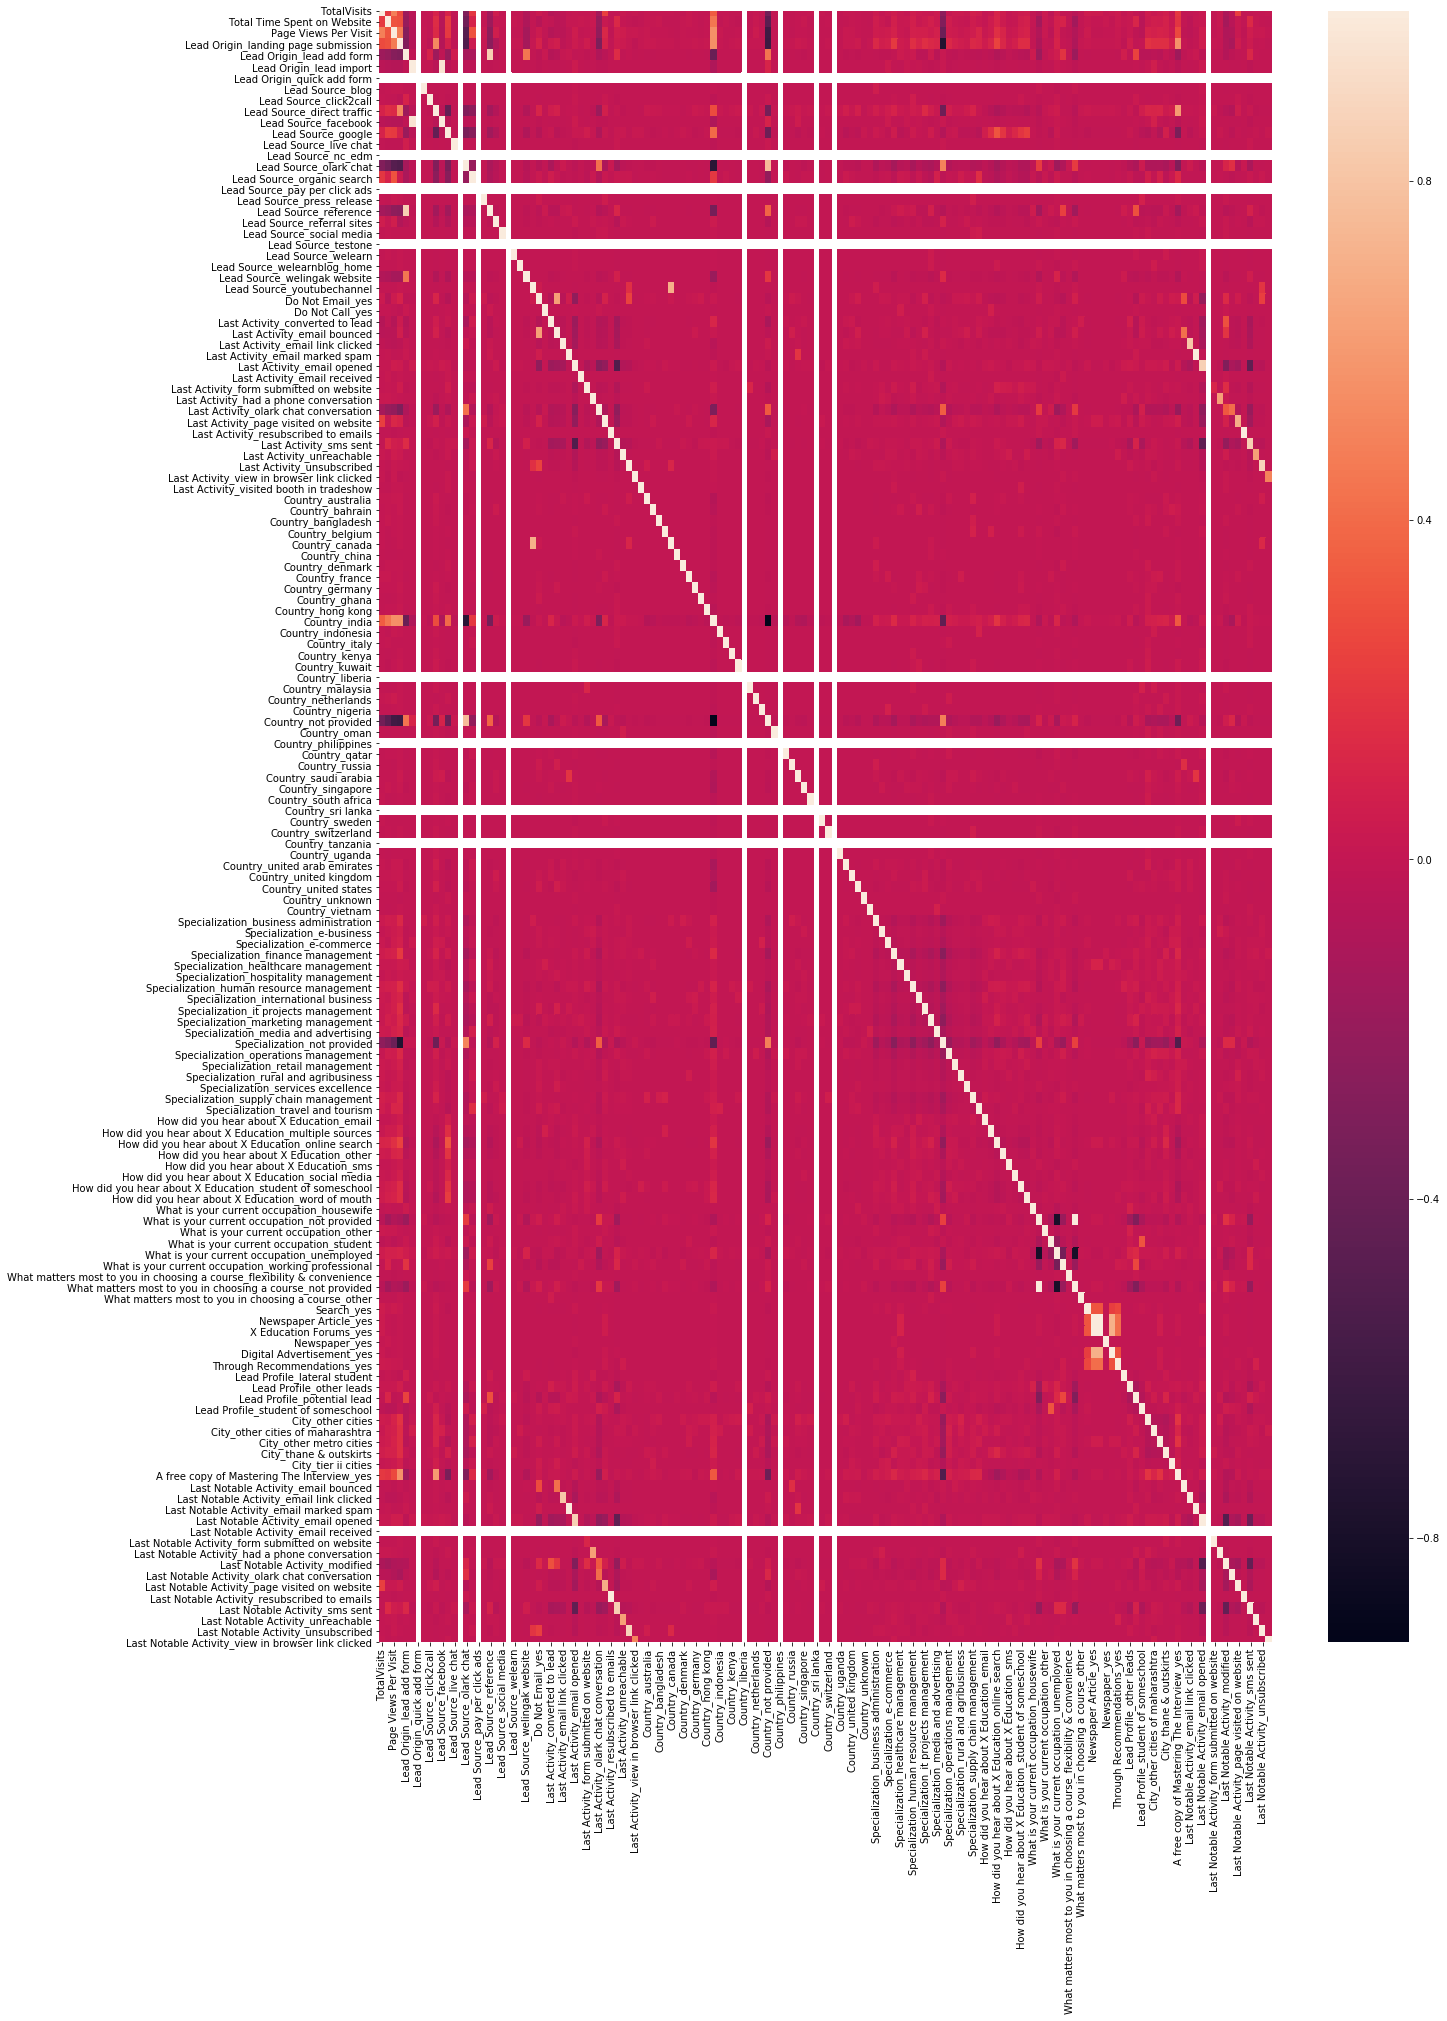

In [108]:
# To check the correlation among varibles
plt.figure(figsize=(20,30))
sns.heatmap(X_train.corr())
plt.show()

### Step 6 Create Model

In [115]:
# Import 'LogisticRegression'
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [116]:
# Import RFE
from sklearn.feature_selection import RFE

In [96]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6468 entries, 3112 to 1289
Columns: 148 entries, TotalVisits to Last Notable Activity_view in browser link clicked
dtypes: float64(3), uint8(145)
memory usage: 1.1 MB


In [ ]:
X_train.

In [117]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [118]:
rfe.support_

array([ True,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
       False, False, False, False, False, False, False, False,  True,
        True, False, False,  True, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False,  True, False,  True, False,
       False, False, False, False, False, False,  True, False,  True,
        True, False,

In [119]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 21),
 ('Lead Origin_landing page submission', False, 5),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 62),
 ('Lead Origin_quick add form', False, 123),
 ('Lead Source_blog', False, 75),
 ('Lead Source_click2call', False, 9),
 ('Lead Source_direct traffic', False, 51),
 ('Lead Source_facebook', False, 27),
 ('Lead Source_google', False, 56),
 ('Lead Source_live chat', False, 71),
 ('Lead Source_nc_edm', False, 121),
 ('Lead Source_olark chat', False, 104),
 ('Lead Source_organic search', False, 55),
 ('Lead Source_pay per click ads', False, 122),
 ('Lead Source_press_release', False, 118),
 ('Lead Source_reference', False, 97),
 ('Lead Source_referral sites', False, 54),
 ('Lead Source_social media', False, 64),
 ('Lead Source_testone', False, 129),
 ('Lead Source_welearn', False, 86),
 ('Lead Source_welearnblog_home', False, 84),
 ('Lead Source_welingak

In [120]:
# Viewing columns selected by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_lead add form', 'Lead Source_welingak website',
       'Do Not Email_yes', 'Last Activity_had a phone conversation',
       'Last Activity_olark chat conversation', 'Last Activity_sms sent',
       'Last Activity_unsubscribed', 'Country_italy', 'Country_nigeria',
       'Country_not provided', 'What is your current occupation_housewife',
       'What is your current occupation_working professional',
       'What matters most to you in choosing a course_not provided',
       'Lead Profile_lateral student', 'Lead Profile_potential lead',
       'Lead Profile_student of someschool',
       'Last Notable Activity_had a phone conversation',
       'Last Notable Activity_modified'],
      dtype='object')

### Assessing the model with StatsModels

In [121]:
import statsmodels.api as sm

In [122]:
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6351
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2443.8
Date:                Mon, 26 Dec 2022   Deviance:                       4887.6
Time:                        14:26:41   Pearson chi2:                 6.29e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                         -2.2567      0.093    -24.181      0.000      -2.440      -2.074
TotalVisits                                                    5.5139      2.025      2.723      0.006       1.545       9.483
Total Time Spent on Website                                    4.5184      0.174     25.957      0.000       4.177       4.860
Lead Origin_lead add form                                      1.9060      0.237      8.052      0.000       1.442       2.370
Lead Source_welingak website                                   3.1313      1.035      3.027      0.002       1.104       5.159
Do Not Email_yes                                              -1.4557      0.183     -7.953      0.000      -1.814      -1.097
Last Activity_had a phone conversation                         1.0192      0.872      1.169      0.242      -0.689       2.728
Last Activity_olark chat conversation                         -0.8649      0.177     -4.879      0.000      -1.212      -0.517
Last Activity_sms sent                                         1.2156      0.078     15.669      0.000       1.064       1.368
Last Activity_unsubscribed                                     1.4803      0.491      3.018      0.003       0.519       2.442
Country_italy                                                -25.6924   7.14e+04     -0.000      1.000    -1.4e+05     1.4e+05
Country_nigeria                                              -25.5612   6.62e+04     -0.000      1.000    -1.3e+05     1.3e+05
Country_not provided                                           1.4472      0.116     12.474      0.000       1.220       1.675
What is your current occupation_housewife                     24.9450    3.8e+04      0.001      0.999   -7.44e+04    7.45e+04
What is your current occupation_working professional           2.3575      0.201     11.727      0.000       1.963       2.751
What matters most to you in choosing a course_not provided    -0.8771      0.090     -9.720      0.000      -1.054      -0.700
Lead Profile_lateral student                                  24.2320    2.6e+04      0.001      0.999    -5.1e+04    5.11e+04
Lead Profile_potential lead                                    1.5418      0.103     14.998      0.000       1.340       1.743
Lead Profile_student of someschool                            -2.3870      0.493     -4.841      0.000      -3.353      -1.421
Last Notable Activity_had a phone conversation                23.7511   4.23e+04      0.001      1.000   -8.29e+04     8.3e+04
Last Notable Activity_modified                                -0.7983      0.086     -9.311      0.000      -0.966      -0.630
===================================

In [123]:
# dropping couple of columns with high p values
col1 = cols.drop(['Last Notable Activity_had a phone conversation','Country_italy'])

#### Model-2

In [124]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6353
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2448.2
Date:                Mon, 26 Dec 2022   Deviance:                       4896.4
Time:                        14:29:29   Pearson chi2:                 6.30e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                         -2.2506      0.093    -24.152      0.000      -2.433      -2.068
TotalVisits                                                    5.5354      2.026      2.732      0.006       1.564       9.507
Total Time Spent on Website                                    4.5014      0.174     25.906      0.000       4.161       4.842
Lead Origin_lead add form                                      1.9067      0.237      8.055      0.000       1.443       2.371
Lead Source_welingak website                                   3.1315      1.035      3.027      0.002       1.104       5.159
Do Not Email_yes                                              -1.4543      0.183     -7.951      0.000      -1.813      -1.096
Last Activity_had a phone conversation                         1.8299      0.732      2.499      0.012       0.395       3.265
Last Activity_olark chat conversation                         -0.8623      0.177     -4.867      0.000      -1.210      -0.515
Last Activity_sms sent                                         1.2109      0.078     15.622      0.000       1.059       1.363
Last Activity_unsubscribed                                     1.4773      0.490      3.013      0.003       0.516       2.438
Country_nigeria                                              -24.5572   4.02e+04     -0.001      1.000   -7.88e+04    7.87e+04
Country_not provided                                           1.4436      0.116     12.451      0.000       1.216       1.671
What is your current occupation_housewife                     23.9433    2.3e+04      0.001      0.999   -4.51e+04    4.52e+04
What is your current occupation_working professional           2.3575      0.201     11.730      0.000       1.964       2.751
What matters most to you in choosing a course_not provided    -0.8767      0.090     -9.724      0.000      -1.053      -0.700
Lead Profile_lateral student                                  23.2163   1.57e+04      0.001      0.999   -3.08e+04    3.09e+04
Lead Profile_potential lead                                    1.5427      0.103     15.020      0.000       1.341       1.744
Lead Profile_student of someschool                            -2.3852      0.493     -4.839      0.000      -3.351      -1.419
Last Notable Activity_modified                                -0.8039      0.086     -9.390      0.000      -0.972      -0.636
==============================================================================================================================
"""

In [125]:
col1 = col1.drop('Country_nigeria')

#### Model-3

In [126]:
X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6354
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2450.7
Date:                Mon, 26 Dec 2022   Deviance:                       4901.4
Time:                        14:30:44   Pearson chi2:                 6.29e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                         -2.2493      0.093    -24.145      0.000      -2.432      -2.067
TotalVisits                                                    5.5615      2.029      2.741      0.006       1.585       9.538
Total Time Spent on Website                                    4.4977      0.174     25.904      0.000       4.157       4.838
Lead Origin_lead add form                                      1.9088      0.237      8.066      0.000       1.445       2.373
Lead Source_welingak website                                   3.1283      1.034      3.024      0.002       1.101       5.156
Do Not Email_yes                                              -1.4524      0.183     -7.944      0.000      -1.811      -1.094
Last Activity_had a phone conversation                         1.8291      0.732      2.499      0.012       0.394       3.264
Last Activity_olark chat conversation                         -0.8636      0.177     -4.875      0.000      -1.211      -0.516
Last Activity_sms sent                                         1.2072      0.077     15.586      0.000       1.055       1.359
Last Activity_unsubscribed                                     1.4754      0.490      3.010      0.003       0.515       2.436
Country_not provided                                           1.4441      0.116     12.461      0.000       1.217       1.671
What is your current occupation_housewife                     23.9425    2.3e+04      0.001      0.999   -4.51e+04    4.52e+04
What is your current occupation_working professional           2.3586      0.201     11.741      0.000       1.965       2.752
What matters most to you in choosing a course_not provided    -0.8772      0.090     -9.734      0.000      -1.054      -0.701
Lead Profile_lateral student                                  23.2143   1.57e+04      0.001      0.999   -3.08e+04    3.09e+04
Lead Profile_potential lead                                    1.5343      0.103     14.961      0.000       1.333       1.735
Lead Profile_student of someschool                            -2.3860      0.493     -4.842      0.000      -3.352      -1.420
Last Notable Activity_modified                                -0.8017      0.086     -9.370      0.000      -0.969      -0.634
==============================================================================================================================
"""

In [127]:
# dropping varaiable What is your current occupation_housewife as it has high P value
col1 = col1.drop('What is your current occupation_housewife')

#### Model-4

In [128]:
X_train_sm = sm.add_constant(X_train[col1])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6355
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2457.7
Date:                Mon, 26 Dec 2022   Deviance:                       4915.4
Time:                        14:32:43   Pearson chi2:                 6.31e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                         -2.2345      0.093    -24.088      0.000      -2.416      -2.053
TotalVisits                                                    5.4527      2.016      2.704      0.007       1.501       9.404
Total Time Spent on Website                                    4.4910      0.173     25.917      0.000       4.151       4.831
Lead Origin_lead add form                                      1.9497      0.236      8.261      0.000       1.487       2.412
Lead Source_welingak website                                   3.0871      1.034      2.985      0.003       1.060       5.114
Do Not Email_yes                                              -1.4576      0.183     -7.972      0.000      -1.816      -1.099
Last Activity_had a phone conversation                         1.8175      0.732      2.484      0.013       0.383       3.252
Last Activity_olark chat conversation                         -0.8699      0.177     -4.912      0.000      -1.217      -0.523
Last Activity_sms sent                                         1.1975      0.077     15.482      0.000       1.046       1.349
Last Activity_unsubscribed                                     1.4706      0.490      3.000      0.003       0.510       2.431
Country_not provided                                           1.4331      0.116     12.400      0.000       1.207       1.660
What is your current occupation_working professional           2.3495      0.201     11.700      0.000       1.956       2.743
What matters most to you in choosing a course_not provided    -0.8826      0.090     -9.804      0.000      -1.059      -0.706
Lead Profile_lateral student                                  23.2011   1.57e+04      0.001      0.999   -3.08e+04    3.09e+04
Lead Profile_potential lead                                    1.5322      0.102     14.962      0.000       1.331       1.733
Lead Profile_student of someschool                            -2.3931      0.493     -4.858      0.000      -3.359      -1.428
Last Notable Activity_modified                                -0.7978      0.085     -9.344      0.000      -0.965      -0.630
==============================================================================================================================
"""

### P values seems to be in range now lets check for VIF


In [129]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Country_not provided,2.09
2,Lead Origin_lead add form,1.92
1,Total Time Spent on Website,1.80
15,Last Notable Activity_modified,1.65
6,Last Activity_olark chat conversation,1.56
11,What matters most to you in choosing a course_...,1.55
7,Last Activity_sms sent,1.47
13,Lead Profile_potential lead,1.46
0,TotalVisits,1.43
3,Lead Source_welingak website,1.32


### Making Prediction on the Train set

In [130]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5414    0.882157
1411    0.388705
2137    0.117415
97      0.078056
4949    0.839320
2447    0.185182
3529    0.189729
4064    0.077143
7208    0.759186
3436    0.315664
dtype: float64

In [131]:
# Reshaping into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.8821568 , 0.38870497, 0.11741486, 0.07805553, 0.83932042,
       0.18518217, 0.18972913, 0.0771432 , 0.75918552, 0.31566443])

### Creating a dataframe actual Converted flag and the predicted probabilities

In [132]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.882157,5414
1,1,0.388705,1411
2,0,0.117415,2137
3,0,0.078056,97
4,1,0.839320,4949


##### Choosing an arbitrary cut-off probability point of 0.5 to find the predicted labels¶
##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [133]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,1,0.882157,5414,1
1,1,0.388705,1411,0
2,0,0.117415,2137,0
3,0,0.078056,97,0
4,1,0.839320,4949,1


### Making the Confusion matrix

In [134]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3475  426]
 [ 684 1787]]


In [135]:
# Let's check the overall accuracy.
print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy : 0.8258003766478342


#### Metrics beyond simply accuracy

In [136]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [137]:
# Sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.7231889923108054


In [138]:
# Let us calculate specificity
print("Specificity : ",TN / float(TN+FP))

Specificity :  0.8907972314791079


In [139]:
# Calculate false postive rate - predicting converted lead when the lead actually was not converted
print("False Positive Rate :",FP/ float(TN+FP))

False Positive Rate : 0.10920276852089209


In [140]:
# positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.8075011296882061


In [141]:
# Negative predictive value
print ("Negative predictive value :",TN / float(TN+ FN))

Negative predictive value : 0.8355373887953835


### Plotting the ROC Curve

In [142]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [143]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

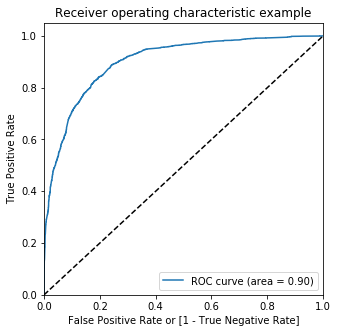

In [144]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

### Finding Optimal Cutoff Point

In [145]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.882157,5414,1,1,1,1,1,1,1,1,1,1,0
1,1,0.388705,1411,0,1,1,1,1,0,0,0,0,0,0
2,0,0.117415,2137,0,1,1,0,0,0,0,0,0,0,0
3,0,0.078056,97,0,1,0,0,0,0,0,0,0,0,0
4,1,0.839320,4949,1,1,1,1,1,1,1,1,1,1,0


In [146]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.387790  1.000000  0.000000
0.1   0.1  0.660389  0.970862  0.463727
0.2   0.2  0.782486  0.924322  0.692643
0.3   0.3  0.808223  0.881020  0.762112
0.4   0.4  0.824074  0.787940  0.846962
0.5   0.5  0.825800  0.723189  0.890797
0.6   0.6  0.812932  0.644678  0.919508
0.7   0.7  0.796139  0.564953  0.942579
0.8   0.8  0.772913  0.461756  0.970008
0.9   0.9  0.726773  0.316066  0.986926


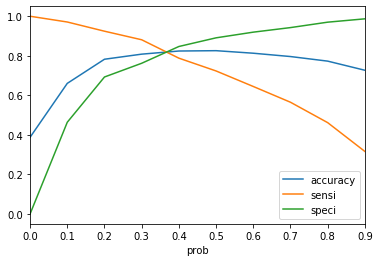

In [147]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

##### From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

In [148]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.882157,5414,1,1,1,1,1,1,1,1,1,1,0,1
1,1,0.388705,1411,0,1,1,1,1,0,0,0,0,0,0,1
2,0,0.117415,2137,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.078056,97,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.839320,4949,1,1,1,1,1,1,1,1,1,1,0,1


#### Assigning Lead Score to the Training data¶

In [149]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,1,0.882157,5414,1,1,1,1,1,1,1,1,1,1,0,1,88
1,1,0.388705,1411,0,1,1,1,1,0,0,0,0,0,0,1,39
2,0,0.117415,2137,0,1,1,0,0,0,0,0,0,0,0,0,12
3,0,0.078056,97,0,1,0,0,0,0,0,0,0,0,0,0,8
4,1,0.839320,4949,1,1,1,1,1,1,1,1,1,1,0,1,84


#### Model Evaluation

In [150]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy : 0.8190521029504081


In [151]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3162,  739],
       [ 414, 2057]], dtype=int64)

In [153]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [154]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.8324564953460137


In [155]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.8105613945142272


In [156]:
# Precision
TP / TP + FP

print("Precision : ",confusion[1,1]/(confusion[0,1]+confusion[1,1]))

Precision :  0.8075011296882061


In [157]:
# Recall
TP / TP + FN

print("Recall :",confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Recall : 0.7231889923108054


### Making predictions on the test set

In [178]:
# Import MinMax scaler
#from sklearn.preprocessing import MinMaxScaler
# Scale the three numeric features
#scaler = MinMaxScaler()
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Origin_quick add form,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
5643,0.003984,0.026408,0.018182,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
7718,0.023904,0.140845,0.054545,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4666,0.011952,0.089789,0.027273,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3476,0.023904,0.095511,0.054545,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4881,0.015936,0.401849,0.072727,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [158]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                                                        'Total Time Spent on Website',
                                                                                                        'Page Views Per Visit']])

In [179]:
# Assigning the columns selected by the final model to the X_test 
X_test = X_test[col1]
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_lead add form,Lead Source_welingak website,Do Not Email_yes,Last Activity_had a phone conversation,Last Activity_olark chat conversation,Last Activity_sms sent,Last Activity_unsubscribed,Country_not provided,What is your current occupation_working professional,What matters most to you in choosing a course_not provided,Lead Profile_lateral student,Lead Profile_potential lead,Lead Profile_student of someschool,Last Notable Activity_modified
5643,0.003984,0.026408,0,0,1,0,0,0,0,0,0,0,0,0,1,1
7718,0.023904,0.140845,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4666,0.011952,0.089789,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3476,0.023904,0.095511,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4881,0.015936,0.401849,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [180]:
# Adding a const
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

5643    0.001178
7718    0.186697
4666    0.030875
3476    0.071903
4881    0.415107
1553    0.558309
4805    0.089154
6393    0.083482
7148    0.309716
4652    0.330551
dtype: float64

In [181]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [182]:
y_pred_1.head()

,0
5643,0.001178
7718,0.186697
4666,0.030875
3476,0.071903
4881,0.415107


In [183]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [184]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [185]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [186]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [187]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,5643,0.001178
1,0,7718,0.186697
2,0,4666,0.030875
3,0,3476,0.071903
4,1,4881,0.415107


In [188]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [189]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_prob'])

In [190]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,5643,0,0.001178
1,7718,0,0.186697
2,4666,0,0.030875
3,3476,0,0.071903
4,4881,1,0.415107


In [191]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.35 else 0)

In [192]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,5643,0,0.001178,0
1,7718,0,0.186697,0
2,4666,0,0.030875,0
3,3476,0,0.071903,0
4,4881,1,0.415107,1


In [193]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy : 0.8300988648846577


In [194]:
# Making the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1442,  299],
       [ 165,  825]], dtype=int64)

In [196]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [197]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.8333333333333334


In [198]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.8282596209075244


#### Assigning Lead Score to the Testing data

In [202]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,5643,0,0.001178,0,0
1,7718,0,0.186697,0,19
2,4666,0,0.030875,0,3
3,3476,0,0.071903,0,7
4,4881,1,0.415107,1,42


### Finding out the leads which should be contacted:

In [203]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=80]
hot_leads

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
12,8610,0,0.834668,1,83
13,4776,1,0.998029,1,100
18,1618,0,0.990388,1,99
20,1869,1,0.909839,1,91
22,7215,1,0.989193,1,99
...,...,...,...,...,...
2706,6021,1,0.873060,1,87
2714,4227,1,0.862581,1,86
2720,8090,1,0.990944,1,99
2722,2497,1,0.997007,1,100


### Finding best features of the Model3

In [205]:
res.params.sort_values(ascending=False)

Lead Profile_lateral student                                  23.201148
TotalVisits                                                    5.452723
Total Time Spent on Website                                    4.491025
Lead Source_welingak website                                   3.087109
What is your current occupation_working professional           2.349501
Lead Origin_lead add form                                      1.949665
Last Activity_had a phone conversation                         1.817455
Lead Profile_potential lead                                    1.532205
Last Activity_unsubscribed                                     1.470577
Country_not provided                                           1.433053
Last Activity_sms sent                                         1.197530
Last Notable Activity_modified                                -0.797754
Last Activity_olark chat conversation                         -0.869864
What matters most to you in choosing a course_not provided    -0